# The School of AI: Assignment 5

## Import necessary packages

In [1]:
import torch
import torch.nn as nn

from utils import *
from model import Net

## Check CUDA availability

In [2]:
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)
device = 'cuda' if torch.cuda.is_available() else 'cpu'

CUDA Available? True


## Get transforms 

In [3]:
train_transforms = get_tfms('train')
test_transforms = get_tfms('test')

## Get Train/Test Datasets

In [4]:
train_ds = get_ds('train', train_transforms)
test_ds = get_ds('test', test_transforms)

## Generate Train/Test dataloaders

In [5]:
batch_size = 512
kwargs = {'batch_size': batch_size, 'shuffle': False, 'num_workers': 2, 'pin_memory': True}
train_loader, test_loader = get_dls(train_ds, test_ds, **kwargs)

### show some sample images from dataloader

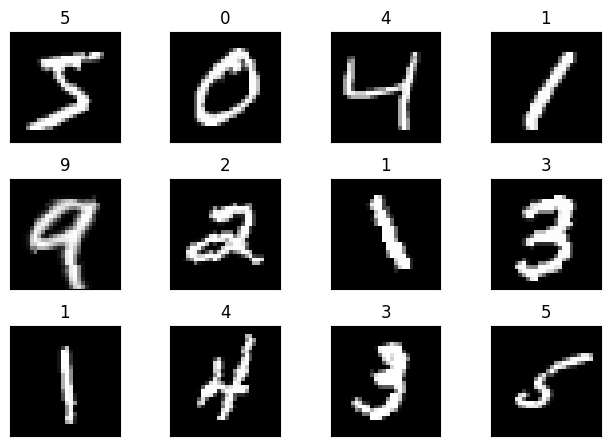

In [6]:
show_dls_samples(train_loader)

## Test the model with some random data

In [7]:
xx = torch.randn(1,1,28,28).to(device)
model = Net().to(device)
pred = model(xx)

## Train the model
- Instantiate the model
- get the optimizer instance
- get the scheduler instance
- get the criterion
- run the training loop for desired number of epochs

In [8]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

In [9]:
model = Net().to(device)
optimizer = get_optimizer(model.parameters(), lr=4e-3, momentum=0.9)
scheduler = get_scheduler(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = getlossCriterion()

num_epochs = 20

for epoch in range(0, num_epochs):
  print(f'Epoch {epoch}')
  train_acc, train_losses = train_step(model, device, train_loader, optimizer, criterion, train_acc, train_losses)
  test_acc, test_losses = test_step(model, device, test_loader, criterion, test_acc, test_losses)
  scheduler.step()

  0%|                                                                                          | 0/118 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 4.0000e-03.
Epoch 0


  0%|                                                                                          | 0/118 [00:00<?, ?it/s]

Test set: Average loss: 0.0010, Accuracy: 8455/10000 (84.55%)

Adjusting learning rate of group 0 to 4.0000e-03.
Epoch 1


  0%|                                                                                          | 0/118 [00:00<?, ?it/s]

Test set: Average loss: 0.0003, Accuracy: 9534/10000 (95.34%)

Adjusting learning rate of group 0 to 4.0000e-03.
Epoch 2


  0%|                                                                                          | 0/118 [00:00<?, ?it/s]

Test set: Average loss: 0.0002, Accuracy: 9688/10000 (96.88%)

Adjusting learning rate of group 0 to 4.0000e-03.
Epoch 3


  0%|                                                                                          | 0/118 [00:00<?, ?it/s]

Test set: Average loss: 0.0002, Accuracy: 9733/10000 (97.33%)

Adjusting learning rate of group 0 to 4.0000e-03.
Epoch 4


  0%|                                                                                          | 0/118 [00:00<?, ?it/s]

Test set: Average loss: 0.0001, Accuracy: 9764/10000 (97.64%)

Adjusting learning rate of group 0 to 4.0000e-03.
Epoch 5


  0%|                                                                                          | 0/118 [00:00<?, ?it/s]

Test set: Average loss: 0.0001, Accuracy: 9805/10000 (98.05%)

Adjusting learning rate of group 0 to 4.0000e-03.
Epoch 6


  0%|                                                                                          | 0/118 [00:00<?, ?it/s]

Test set: Average loss: 0.0001, Accuracy: 9803/10000 (98.03%)

Adjusting learning rate of group 0 to 4.0000e-03.
Epoch 7


  0%|                                                                                          | 0/118 [00:00<?, ?it/s]

Test set: Average loss: 0.0001, Accuracy: 9807/10000 (98.07%)

Adjusting learning rate of group 0 to 4.0000e-03.
Epoch 8


  0%|                                                                                          | 0/118 [00:00<?, ?it/s]

Test set: Average loss: 0.0001, Accuracy: 9820/10000 (98.20%)

Adjusting learning rate of group 0 to 4.0000e-03.
Epoch 9


  0%|                                                                                          | 0/118 [00:00<?, ?it/s]

Test set: Average loss: 0.0001, Accuracy: 9834/10000 (98.34%)

Adjusting learning rate of group 0 to 4.0000e-03.
Epoch 10


  0%|                                                                                          | 0/118 [00:00<?, ?it/s]

Test set: Average loss: 0.0001, Accuracy: 9861/10000 (98.61%)

Adjusting learning rate of group 0 to 4.0000e-03.
Epoch 11


  0%|                                                                                          | 0/118 [00:00<?, ?it/s]

Test set: Average loss: 0.0001, Accuracy: 9856/10000 (98.56%)

Adjusting learning rate of group 0 to 4.0000e-03.
Epoch 12


  0%|                                                                                          | 0/118 [00:00<?, ?it/s]

Test set: Average loss: 0.0001, Accuracy: 9848/10000 (98.48%)

Adjusting learning rate of group 0 to 4.0000e-03.
Epoch 13


  0%|                                                                                          | 0/118 [00:00<?, ?it/s]

Test set: Average loss: 0.0001, Accuracy: 9872/10000 (98.72%)

Adjusting learning rate of group 0 to 4.0000e-03.
Epoch 14


  0%|                                                                                          | 0/118 [00:00<?, ?it/s]

Test set: Average loss: 0.0001, Accuracy: 9881/10000 (98.81%)

Adjusting learning rate of group 0 to 4.0000e-04.
Epoch 15


  0%|                                                                                          | 0/118 [00:00<?, ?it/s]

Test set: Average loss: 0.0001, Accuracy: 9896/10000 (98.96%)

Adjusting learning rate of group 0 to 4.0000e-04.
Epoch 16


  0%|                                                                                          | 0/118 [00:00<?, ?it/s]

Test set: Average loss: 0.0001, Accuracy: 9905/10000 (99.05%)

Adjusting learning rate of group 0 to 4.0000e-04.
Epoch 17


  0%|                                                                                          | 0/118 [00:00<?, ?it/s]

Test set: Average loss: 0.0001, Accuracy: 9906/10000 (99.06%)

Adjusting learning rate of group 0 to 4.0000e-04.
Epoch 18


  0%|                                                                                          | 0/118 [00:00<?, ?it/s]

Test set: Average loss: 0.0001, Accuracy: 9905/10000 (99.05%)

Adjusting learning rate of group 0 to 4.0000e-04.
Epoch 19


Train: Loss=0.0895 Batch_id=117 Accuracy=98.71: 100%|████████████████████████████████| 118/118 [00:06<00:00, 18.05it/s]


Test set: Average loss: 0.0001, Accuracy: 9902/10000 (99.02%)

Adjusting learning rate of group 0 to 4.0000e-04.


## Plot the accuracies / Losses

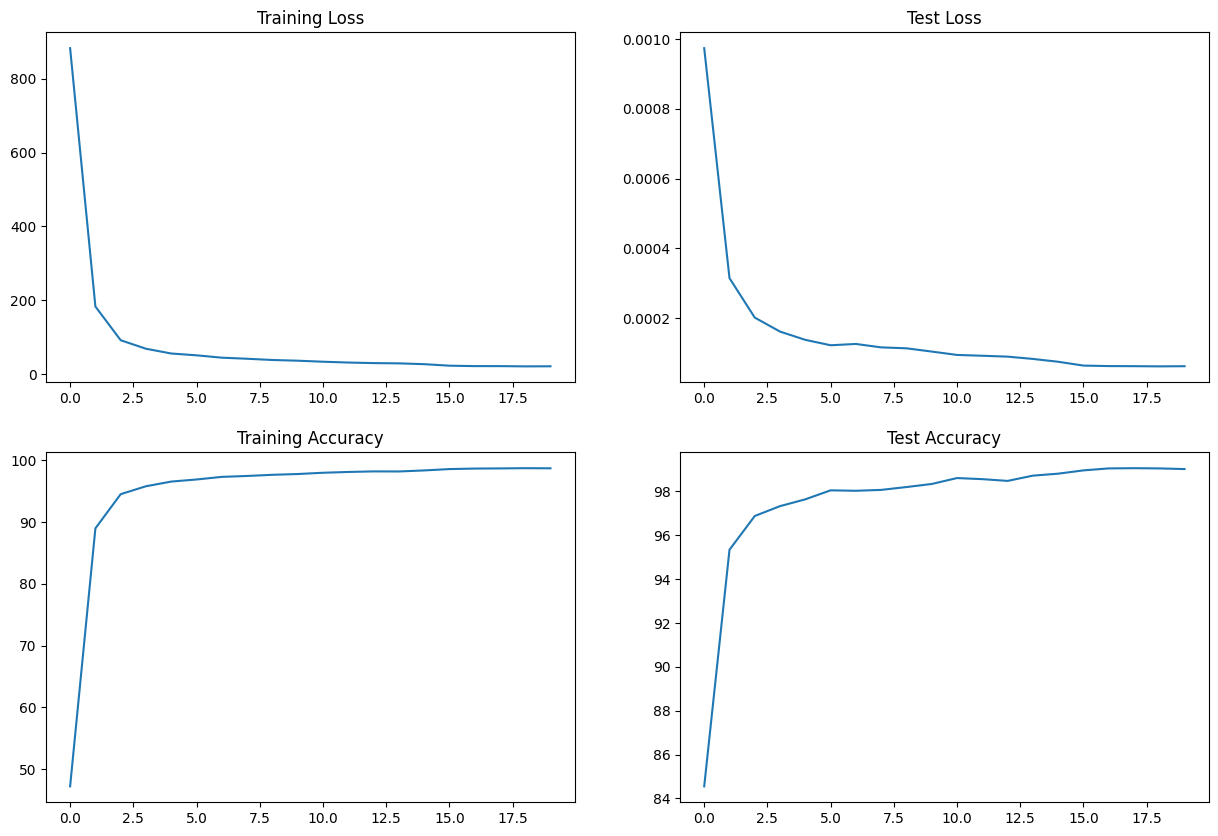

In [10]:
plot_acc_loss(train_losses, train_acc, test_losses, test_acc)

## Model Summary

In [11]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
            Conv2d-2           [-1, 64, 24, 24]          18,496
            Conv2d-3          [-1, 128, 10, 10]          73,856
            Conv2d-4            [-1, 256, 8, 8]         295,168
            Linear-5                   [-1, 50]         204,850
            Linear-6                   [-1, 10]             510
Total params: 593,200
Trainable params: 593,200
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.94
----------------------------------------------------------------
